In [9]:
#Capítulo #6 Aplicaciones del Mundo Real de la Computación Cuántica
#Inteligencia Artificial Cuántica


C:\Users\denis\AppData\Local\Temp\ipykernel_696\880736728.py:22: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Resultados de la clasificación cuántica: {'00': np.float64(0.2724609375), '01': np.float64(0.2392578125), '10': np.float64(0.2421875), '11': np.float64(0.24609375)}
Precisión del modelo QSVC: 1.0


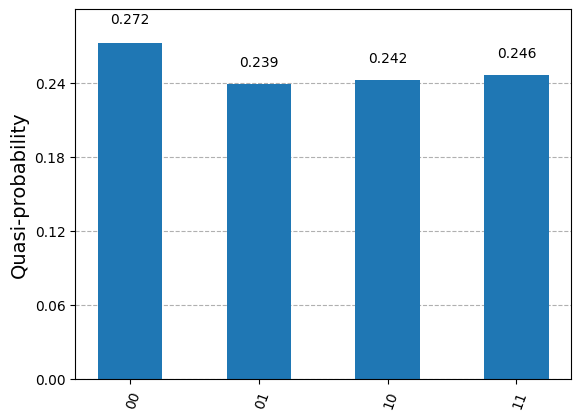

In [10]:
from qiskit import QuantumCircuit
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
import numpy as np

# Generar un dataset cuántico simulado
train_features, train_labels, test_features, test_labels = ad_hoc_data(training_size=20, test_size=10, n=2, gap=0.3)

# Convertir las etiquetas a formato 1D
train_labels = np.argmax(train_labels, axis=1)
test_labels = np.argmax(test_labels, axis=1)

# Crear un circuito cuántico para clasificar los datos
qc = QuantumCircuit(2)
qc.h([0, 1])
qc.cx(0, 1)
qc.measure_all()

# Ejecutar en un simulador cuántico
sampler = Sampler()
job = sampler.run(qc, shots=1024)
result = job.result()

# Obtener los resultados
counts = result.quasi_dists[0].binary_probabilities()
print(f"Resultados de la clasificación cuántica: {counts}")



# Crear y entrenar el modelo QSVC
qsvc = QSVC()
qsvc.fit(train_features, train_labels)

# Evaluar el modelo
score = qsvc.score(test_features, test_labels)
print(f"Precisión del modelo QSVC: {score}")

# Visualizar los resultados
plot_histogram(counts)